In [5]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
from mmcv.cnn import fuse_conv_bn
from mmcv.runner import wrap_fp16_model

In [134]:
model = init_detector('vfnet.py', 'vfnet/epoch_10.pth', device="cuda:0")
wrap_fp16_model(model)
model = fuse_conv_bn(model)

load checkpoint from local path: vfnet/epoch_10.pth


2022-06-20 11:51:30,884 - root - INFO - ModulatedDeformConvPack backbone.layer2.0.conv2 is upgraded to version 2.
2022-06-20 11:51:30,887 - root - INFO - ModulatedDeformConvPack backbone.layer2.1.conv2 is upgraded to version 2.
2022-06-20 11:51:30,889 - root - INFO - ModulatedDeformConvPack backbone.layer2.2.conv2 is upgraded to version 2.
2022-06-20 11:51:30,891 - root - INFO - ModulatedDeformConvPack backbone.layer2.3.conv2 is upgraded to version 2.
2022-06-20 11:51:30,893 - root - INFO - ModulatedDeformConvPack backbone.layer3.0.conv2 is upgraded to version 2.
2022-06-20 11:51:30,896 - root - INFO - ModulatedDeformConvPack backbone.layer3.1.conv2 is upgraded to version 2.
2022-06-20 11:51:30,898 - root - INFO - ModulatedDeformConvPack backbone.layer3.2.conv2 is upgraded to version 2.
2022-06-20 11:51:30,901 - root - INFO - ModulatedDeformConvPack backbone.layer3.3.conv2 is upgraded to version 2.
2022-06-20 11:51:30,903 - root - INFO - ModulatedDeformConvPack backbone.layer3.4.conv2 

In [141]:
import cv2
img = cv2.imread('result6.png')
h, w, c = img.shape
#img = img[int(h*3/10):int(h*9/10), int(w*1/10):int(w*9/10), :]  # zoom 30% crop on top, 10% on bottom, 10% on left and right
result = inference_detector(model, img)

In [58]:
import glob
i = 0
for file in glob.glob('pics_new_zoom/*.png'):
  img = file
  result = inference_detector(model, img)
  model.show_result(img, result, out_file=f'results_zoom/{i}.jpg')
  i += 1

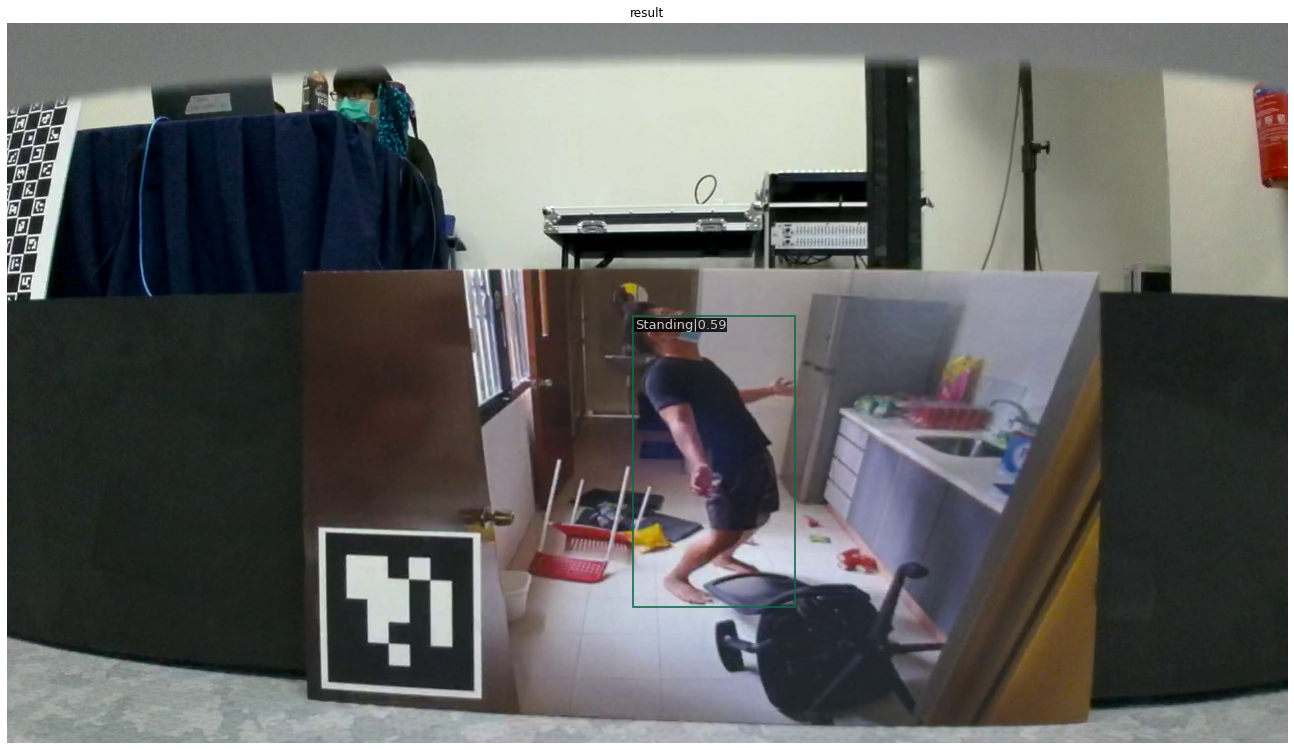

In [142]:
show_result_pyplot(model, img, result)